## Log Transforms

In [6]:
import numpy as np
import pandas as pd

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
y = np.arange(0.000001, 3, 0.01)
x = np.power(10, y)

Text(0,0.5,'log10(x)')

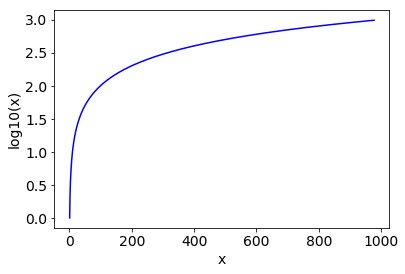

In [5]:
fig, ax = plt.subplots()
plt.plot(x, y, 'b')
ax.tick_params(labelsize=14)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('log10(x)', fontsize=14)

In [7]:
biz_df = pd.read_json("input/yelp/small_business.json.zip",lines=True, compression="zip")

In [8]:
log_review_count = np.log10(biz_df['review_count'] + 1)

Text(0,0.5,'Occurrence')

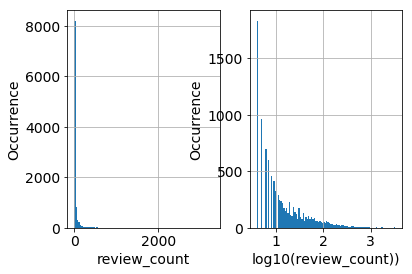

In [27]:
plt.figure()
ax = plt.subplot(1,2,1)
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('review_count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

ax = plt.subplot(1,2,2)
log_review_count.hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('log10(review_count))', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## Box-Cox

In [18]:
from scipy import stats

In [19]:
biz_df['review_count'].min()

3

In [21]:
# Setting input parameter lmbda to 0 gives us the log transform (without constant offset)
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)

In [22]:
# By default, the scipy implementation of Box-Cox transform finds the lmbda parameter
# that will make the output the closest to a normal distribution
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.38391193092943

In [23]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0,0.5,'Occurrence')

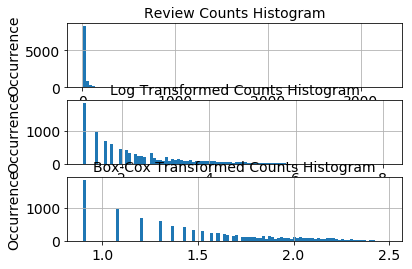

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# original review count histogram
biz_df['review_count'].hist(ax=ax1, bins=100)
#ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)
# review count after log transform
biz_df['rc_log'].hist(ax=ax2, bins=100)
#ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)# review count after optimal Box-Cox transform
biz_df['rc_bc'].hist(ax=ax3, bins=100)
#ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

Text(0,0.5,'Occurrence')

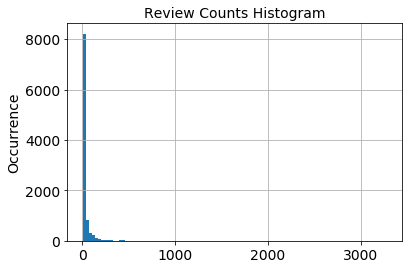

In [43]:
fig, ax1 = plt.subplots()
# original review count histogram
biz_df['review_count'].hist(ax=ax1, bins=100)
#ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)